# Questions
1. How to get "current week" quiz grade. How to find (other than hardcode) the quiz - week relevance

In [1]:
import src.roberta as rob

In [2]:
import pandas as pd
import numpy as np

In [ ]:
# 

In [3]:
df = pd.read_csv("data/anonymized_results.csv")

In [5]:
for i in df["week2_What was the most confusing part of this week's material? What questions do you still have about this week's material? (You can leave this blank if this week's material was clear.)"]:
    print(i)

nan
Again I'd say the most confusing part from this week was learning about 'return' and __name__ == "__main__" 
nan
nan
nan
nan
nan
The lab checkpoints were hard to the point that I couldn't finish it. I have no idea how functions work still, and would need someone to help me out with them. I will definitely get help though.
nan
I likely will need more practice with functions
nan
see above 
nan
nan
nan
nan
After going to office hours and reviewing the book, the material was clear for me. 
nan
nan
nan
nan
nan
nan
nan
nan
nan
Probably the same as above,
nan
The code templates from my last answer.
nan
nan
nan
Why is if __name__ == "__main__": necessary?
Defining a function. When shall we print the result and when should we return the result to the function.
nan
After practicing, I've been able to slowly get the hang of my challenges with defining functions.
nan
nan
nan
nan
nan
nan
nan
nan
nan
Defining functions was the most difficult for me. I could not understand what variables to use w

## Idea 1. 
##### Let's make one long text column for each week reflection, find it's sentiment score and try to correlate it with quiz grade
1.1. (1 student - all reflections / all quizes)

1.2. (1 week - all reflections / all quizes)

## Idea 2
##### Clusterize people
by sentiment analysis?

## Idea 3
Does "too challenging/just right" depends on any of scores?
Just in general or as pattern for cummulative grade?

In [4]:
for ind, col in enumerate(df.columns):
    print(f"{ind}: <{col}>")

0: <PA01 (Real)>
1: <PA02 (Real)>
2: <PA03 (Real)>
3: <PA04 (Real)>
4: <PA05 (Real)>
5: <PA06 (Real)>
6: <PA07 (Real)>
7: <PA08 (Real)>
8: <PA09 (Real)>
9: <PA10 (Real)>
10: <zyBook PAs total (Real)>
11: <CA01 (Real)>
12: <CA02 (Real)>
13: <CA03 (Real)>
14: <CA04 (Real)>
15: <CA05 (Real)>
16: <CA06 (Real)>
17: <CA07 (Real)>
18: <CA08 (Real)>
19: <CA09 (Real)>
20: <zyBook Challenge Activities (CAs) total (Real)>
21: <Week 1 checkpoint labs (Real)>
22: <Week 2 checkpoint labs (Real)>
23: <Week 3 checkpoint labs (Real)>
24: <Week 4 checkpoint labs (Real)>
25: <Week 5 checkpoint labs (Real)>
26: <Week 6 checkpoint labs (Real)>
27: <Week 7 checkpoint labs (Real)>
28: <Week 8 checkpoint labs (Real)>
29: <Week 9 checkpoint labs (Real)>
30: <Lab Checkpoint total (Real)>
31: <LA01 (Real)>
32: <LA02 (Real)>
33: <LA03 (Real)>
34: <LA04 (Real)>
35: <LA05 (Real)>
36: <Week 6 labs (zyBook 6.15 - 6.20) (Real)>
37: <Week 6 labs (Gradescope) (Real)>
38: <LA06 (combined) total (Real)>
39: <LA07 (Real)>


### Step 1 - join all text

In [5]:
target = pd.DataFrame()
dump = pd.DataFrame()

In [6]:
for week_n in range(2, 9):
    target[f"week{week_n}_text"] = [""] * len(df)
    for col in df.columns:
        if f"week{week_n}" in col:
            if len(df.groupby([col]).size()) < 10:
                continue
            dump[col] = df[col]
            dump.loc[dump[col].astype(str).str.len() < 5,col] = ""
            dump.fillna("", inplace=True)
            target[f"week{week_n}_text"] += " " +  dump[col].astype(str)

In [7]:
target.describe()

,week2_text,week3_text,week4_text,week5_text,week6_text,week7_text,week8_text
count,283,283,283,283,283,283,283
unique,223,235,74,227,220,209,199
top,,,,,,,
freq,61,49,210,57,64,75,85


In [8]:
cur_cols = target.columns
for col in cur_cols:
    num = col[4]
    list_col = [str(i)for i in target[col]]
    lengths = [len(i) for i in list_col]
    print(min(lengths), max(lengths), sum(lengths)/len(lengths))
    print(len([i for i in lengths if i > 500]))
    list_col = [i[:500] for i in list_col]
    target[f"week{num}_santiment"] = rob.get_scores_for(list_col)

    #See how they came - neg, neu, pos
target.head()


0 6221 390.06007067137807
76
0 5827 596.4134275618375
150
0 2122 148.46996466431096
33
0 5499 352.56890459363956
59
0 4578 395.37455830388694
80
0 5153 375.4982332155477
74
0 3709 252.87279151943463
42


,week2_text,week3_text,week4_text,week5_text,week6_text,week7_text,week8_text,week2_santiment,week3_santiment,week4_santiment,week5_santiment,week6_santiment,week7_santiment,week8_santiment
0,,listsit’s going really interesting Worked thro...,,Assertworking hardstressing consistency keep w...,,,string slicingwalk-thru videoa little vague fe...,"[0.2582943, 0.4512725, 0.29043332]","[0.001499872, 0.0491485, 0.94935167]","[0.2582943, 0.4512725, 0.29043332]","[0.021503685, 0.40286487, 0.5756314]","[0.2582943, 0.4512725, 0.29043332]","[0.2582943, 0.4512725, 0.29043332]","[0.023035778, 0.8128868, 0.16407752]"
1,Learning about the import math was pretty simp...,"I really enjoyed the binary number section, I ...",,This week's material was pretty understandable...,I loved the range topic. I thought that sectio...,"Everything was going super well, however latel...",Loops are still giving me somewhat of a hard t...,"[0.90594226, 0.08266086, 0.011397009]","[0.027257655, 0.11857229, 0.85417014]","[0.2582943, 0.4512725, 0.29043332]","[0.06742058, 0.28406483, 0.64851457]","[0.057165865, 0.19182026, 0.7510138]","[0.11608611, 0.29764268, 0.58627117]","[0.34721965, 0.4039822, 0.24879816]"
2,The print statement seemed pretty straightforw...,"List BasicsBinary, it just seems difficult to ...",,"print functions what is ""if___name_='__main__'...",The double for loop was a bit confusing but af...,Coding in general is fun. List slicingList met...,Function arguments The examples in zybooks hel...,"[0.03377101, 0.16003606, 0.8061929]","[0.36192757, 0.5521803, 0.08589206]","[0.2582943, 0.4512725, 0.29043332]","[0.007052757, 0.042230878, 0.9507163]","[0.041252047, 0.16399479, 0.7947532]","[0.088888034, 0.32144544, 0.5896665]","[0.33628613, 0.473782, 0.18993187]"
3,,the lists and tuples content was easy for meTh...,,The lab about car washes was hard for me. The ...,,,,"[0.2582943, 0.4512725, 0.29043332]","[0.3862661, 0.3831341, 0.23059979]","[0.2582943, 0.4512725, 0.29043332]","[0.6162068, 0.30189237, 0.08190069]","[0.2582943, 0.4512725, 0.29043332]","[0.2582943, 0.4512725, 0.29043332]","[0.2582943, 0.4512725, 0.29043332]"
4,,dictionariesI like the ability to call attribu...,,FunctionsSimple text editor + python.exe (hard...,,good classliststhe more options the betterI di...,,"[0.2582943, 0.4512725, 0.29043332]","[0.0067201327, 0.27358264, 0.7196972]","[0.2582943, 0.4512725, 0.29043332]","[0.041130934, 0.26247755, 0.6963916]","[0.2582943, 0.4512725, 0.29043332]","[0.020695375, 0.30797598, 0.67132866]","[0.2582943, 0.4512725, 0.29043332]"


In [9]:
for num in range(2, 9):
    for col in df.columns:
        if f"Week {num} checkpoint labs" in col:
            target[f"score_{num}"] = df[col]

In [55]:
target

,week2_text,week3_text,week4_text,week5_text,week6_text,week7_text,week8_text,week2_santiment,week3_santiment,week4_santiment,...,week6_santiment,week7_santiment,week8_santiment,score_2,score_3,score_4,score_5,score_6,score_7,score_8
0,,listsit’s going really interesting Worked thro...,,Assertworking hardstressing consistency keep w...,,,string slicingwalk-thru videoa little vague fe...,"[0.2582943, 0.4512725, 0.29043332]","[0.001499872, 0.0491485, 0.94935167]","[0.2582943, 0.4512725, 0.29043332]",...,"[0.2582943, 0.4512725, 0.29043332]","[0.2582943, 0.4512725, 0.29043332]","[0.023035778, 0.8128868, 0.16407752]",0.0,70.0,87.5,100.0,100.0,22.73,0.0
1,Learning about the import math was pretty simp...,"I really enjoyed the binary number section, I ...",,This week's material was pretty understandable...,I loved the range topic. I thought that sectio...,"Everything was going super well, however latel...",Loops are still giving me somewhat of a hard t...,"[0.90594226, 0.08266086, 0.011397009]","[0.027257655, 0.11857229, 0.85417014]","[0.2582943, 0.4512725, 0.29043332]",...,"[0.057165865, 0.19182026, 0.7510138]","[0.11608611, 0.29764268, 0.58627117]","[0.34721965, 0.4039822, 0.24879816]",100.0,100.0,100.0,100.0,100.0,0.0,11.76
2,The print statement seemed pretty straightforw...,"List BasicsBinary, it just seems difficult to ...",,"print functions what is ""if___name_='__main__'...",The double for loop was a bit confusing but af...,Coding in general is fun. List slicingList met...,Function arguments The examples in zybooks hel...,"[0.03377101, 0.16003606, 0.8061929]","[0.36192757, 0.5521803, 0.08589206]","[0.2582943, 0.4512725, 0.29043332]",...,"[0.041252047, 0.16399479, 0.7947532]","[0.088888034, 0.32144544, 0.5896665]","[0.33628613, 0.473782, 0.18993187]",100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,,the lists and tuples content was easy for meTh...,,The lab about car washes was hard for me. The ...,,,,"[0.2582943, 0.4512725, 0.29043332]","[0.3862661, 0.3831341, 0.23059979]","[0.2582943, 0.4512725, 0.29043332]",...,"[0.2582943, 0.4512725, 0.29043332]","[0.2582943, 0.4512725, 0.29043332]","[0.2582943, 0.4512725, 0.29043332]",0.0,100.0,12.5,100.0,0.0,0.0,0.0
4,,dictionariesI like the ability to call attribu...,,FunctionsSimple text editor + python.exe (hard...,,good classliststhe more options the betterI di...,,"[0.2582943, 0.4512725, 0.29043332]","[0.0067201327, 0.27358264, 0.7196972]","[0.2582943, 0.4512725, 0.29043332]",...,"[0.2582943, 0.4512725, 0.29043332]","[0.020695375, 0.30797598, 0.67132866]","[0.2582943, 0.4512725, 0.29043332]",100.0,100.0,100.0,63.64,72.41,100.0,11.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,Arithmetic expressionI think writing a whole f...,,,5.2 print functionDoing homework and learning ...,To understand how loop function workbreak and ...,Coding is interestingWhen there is error in my...,keyword argumentZybooks and PiazzaIt is useful...,"[0.045077525, 0.30250764, 0.65241474]","[0.2582943, 0.4512725, 0.29043332]","[0.2582943, 0.4512725, 0.29043332]",...,"[0.010942643, 0.16613798, 0.8229195]","[0.08471588, 0.3279862, 0.58729804]","[0.0016877953, 0.023459869, 0.9748523]",100.0,100.0,100.0,100.0,100.0,100.0,82.35
279,Floating points are the easiest part of this w...,string basicsdisctionary is the most challengi...,the if else brank makes it challenging for me ...,print functionscope of variablesmy understandi...,for loopbreak and continueYes! It worked.ZyBoo...,It's pretty funlist nestingdictionaryBoth are ...,the check point lab is a little bit confusi...,"[0.016772341, 0.10281553, 0.88041216]","[0.27458036, 0.5501523, 0.17526737]","[0.005506931, 0.044773247, 0.9497198]",...,"[0.0035829598, 0.07334186, 0.92307526]","[0.003486595, 0.022270437, 0.9742431]","[0.046020243, 0.17612804, 0.7778517]",100.0,100.0,100.0,100.0,100.0,100.0,94.12
280,output and inputfunction about calculate calor...,function together with sets most familiar oneW...,if else statement4.1 

### Let's check dependensies
All weeks separetly

and

All weeks combined

(clusters of sentiment analysis)

In [11]:
num = 1
prediction["A"] = target[f"week{num}_santiment"].apply(lambda x: x[0])
prediction["B"] = target[f"week{num}_santiment"].apply(lambda x: x[1])
prediction["C"] = target[f"week{num}_santiment"].apply(lambda x: x[2])
prediction["Y"] = target[f"score_{num}"]

prediction.loc[prediction["Y"] == "-","Y"] = 0

KeyError: 'week1_santiment'

In [12]:
from matplotlib import pyplot as plt
for num in range(2, 9):
    fig = plt.figure()
    prediction = pd.DataFrame()
    prediction["A"] = target[f"week{num}_santiment"].apply(lambda x: x[0])
    prediction["B"] = target[f"week{num}_santiment"].apply(lambda x: x[1])
    prediction["C"] = target[f"week{num}_santiment"].apply(lambda x: x[2])
    ax.scatter(prediction["A"], prediction["B"], prediction["C"])
    plt.set_xlabel('negative')
    plt.set_zlabel('positive')
    plt.show()

NameError: name 'ax' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.linear_model import LinearRegression
X = prediction[["A", "B", "C"]].to_numpy()
y = prediction["Y"].to_numpy()
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))

In [ ]:
prediction

In [72]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.30, min_samples=1)

In [73]:
clustering = pd.DataFrame()
for num in range(2,9):
    target = target[target[f"week{num}_text"].str.len() > 2]
for num in range(2,9):
    col = f"week{num}_santiment"
    clustering[f"week{num}_neg"] = target[col].apply(lambda x: x[0])
    clustering[f"week{num}_neu"] = target[col].apply(lambda x: x[1])
    clustering[f"week{num}_pos"] = target[col].apply(lambda x: x[2])
    
X = clustering.to_numpy()
X

yhat = model.fit_predict(X)

In [74]:
from numpy import unique
clusters = unique(yhat)

In [75]:
clusters

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53], dtype=int64)

In [ ]:
yhat
    

In [76]:

for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    print(row_ix)

(array([0], dtype=int64),)
(array([1], dtype=int64),)
(array([2], dtype=int64),)
(array([3], dtype=int64),)
(array([4], dtype=int64),)
(array([5], dtype=int64),)
(array([6], dtype=int64),)
(array([7], dtype=int64),)
(array([8], dtype=int64),)
(array([9], dtype=int64),)
(array([10], dtype=int64),)
(array([11], dtype=int64),)
(array([12], dtype=int64),)
(array([13], dtype=int64),)
(array([14], dtype=int64),)
(array([15], dtype=int64),)
(array([16], dtype=int64),)
(array([17], dtype=int64),)
(array([18], dtype=int64),)
(array([19], dtype=int64),)
(array([20], dtype=int64),)
(array([21], dtype=int64),)
(array([22], dtype=int64),)
(array([23], dtype=int64),)
(array([24], dtype=int64),)
(array([25], dtype=int64),)
(array([26], dtype=int64),)
(array([27], dtype=int64),)
(array([28], dtype=int64),)
(array([29], dtype=int64),)
(array([30], dtype=int64),)
(array([31], dtype=int64),)
(array([32], dtype=int64),)
(array([33], dtype=int64),)
(array([34], dtype=int64),)
(array([35], dtype=int64),)
(a

In [83]:
X.shape

(54, 21)

In [78]:
import sklearn.manifold
model = sklearn.manifold.TSNE().fit_transform(X)

L:\Users\nectostr\miniconda3\envs\nlp\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
L:\Users\nectostr\miniconda3\envs\nlp\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [79]:
model.shape

(54, 2)

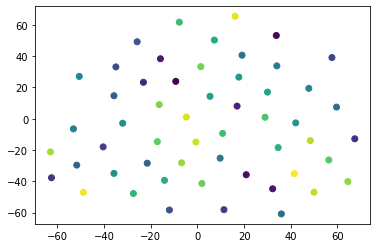

In [80]:
plt.scatter(model[:,0], model[:,1], c=yhat)


In [ ]:
strangers = [ 23,  24,  25,  29,  41,  77,  79,  81,  88,  96, 101, 109, 133,
       159, 162, 183, 184, 211, 217, 227, 229, 253]

In [ ]:
for i in strangers:
    for col in df.columns:
        print(col)
        print(df.iloc[i][col])
    print()

In [20]:
import re

In [21]:
LDA = pd.DataFrame()

In [22]:
LDA['X'] = \
target['week3_text'].map(lambda x: re.sub('[,\.!?]', '', x))# Convert the titles to lowercase
LDA['X'] = \
LDA['X'].map(lambda x: x.lower())# Print out the first rows of papers
LDA['X'].head()

0    listsit’s going really interesting worked thro...
1    i really enjoyed the binary number section i t...
2    list basicsbinary it just seems difficult to u...
3    the lists and tuples content was easy for meth...
4    dictionariesi like the ability to call attribu...
Name: X, dtype: object

In [28]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
         if word not in stop_words] for doc in texts]

data = LDA.X.values.tolist()
data_words = list(sent_to_words(data))# remove stop words
data_words = remove_stopwords(data_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nectostr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
import gensim.corpora as corpora# Create Dictionary
id2word = corpora.Dictionary(data_words)# Create Corpus
texts = data_words# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [49]:
from pprint import pprint
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.016*"attended" + 0.016*"lab" + 0.014*"class" + 0.014*"zybook" + '
  '0.014*"sessions" + 0.014*"activities" + 0.012*"took" + 0.012*"wednesday" + '
  '0.011*"work" + 0.010*"quiz"'),
 (1,
  '0.021*"activities" + 0.016*"wednesday" + 0.016*"lab" + 0.015*"zybook" + '
  '0.015*"class" + 0.014*"attended" + 0.013*"gauchospace" + 0.012*"thursday" + '
  '0.012*"tuesday" + 0.011*"sessions"'),
 (2,
  '0.015*"activities" + 0.014*"class" + 0.013*"took" + 0.011*"gauchospace" + '
  '0.010*"lab" + 0.010*"wednesday" + 0.010*"zybook" + 0.009*"quiz" + '
  '0.009*"work" + 0.009*"practice"'),
 (3,
  '0.031*"lab" + 0.028*"activities" + 0.028*"attended" + 0.026*"sessions" + '
  '0.019*"class" + 0.016*"work" + 0.016*"quiz" + 0.016*"optional" + '
  '0.015*"practice" + 0.015*"gauchospace"'),
 (4,
  '0.012*"zybook" + 0.010*"wednesday" + 0.009*"class" + 0.009*"gauchospace" + '
  '0.009*"thursday" + 0.009*"week" + 0.008*"lab" + 0.008*"activities" + '
  '0.008*"took" + 0.007*"work"')]


In [50]:
#list(lda_model[corpus])

In [53]:
target.iloc[23]

week2_text                                           
week3_text                                           
week4_text                                           
week5_text                                           
week6_text                                           
week7_text                                           
week8_text                                           
week2_santiment    [0.2582943, 0.4512725, 0.29043332]
week3_santiment    [0.2582943, 0.4512725, 0.29043332]
week4_santiment    [0.2582943, 0.4512725, 0.29043332]
week5_santiment    [0.2582943, 0.4512725, 0.29043332]
week6_santiment    [0.2582943, 0.4512725, 0.29043332]
week7_santiment    [0.2582943, 0.4512725, 0.29043332]
week8_santiment    [0.2582943, 0.4512725, 0.29043332]
score_2                                          50.0
score_3                                          70.0
score_4                                          12.5
score_5                                           0.0
score_6                     